# US Presidential Election 2020

In [1]:
import sys
import os
import pyLDAvis

In [2]:
sys.path.append(os.path.abspath('src'))

In [3]:
from src import preprocessing, topic_modeling, deepseek, misc_utils, train_model

In [4]:
# Define the configuration file path
config_path = 'conf/config.yaml'

In [ ]:
# Run the preprocessing pipeline - Takes very long ~30mins
# print("Running preprocessing pipeline...")
# tweets_with_dups, tweets_no_dups = preprocessing.run_preprocessing_pipeline(config_path)

In [5]:
dtm_results = topic_modeling.topic_preprocess(config_path)

Loading dataset...
Processing the CounterVectorizer and TfidfVectorizer
Processing Biden dataset...
Processing Trump dataset...
Processing combine dataset with duplicates...
Topic Modeling Preprocessing Complete!


In [6]:
# @Anthony: Ways to get all the keys out!!!
# Just need to sum all the values of each dtm to get the word count to create word cloud
# Can print to find all the keys
# print(dtm_results.keys())
# print(dtm_results['vectorizer'].keys())
# print(dtm_results['biden'].keys())
# print(dtm_results['trump'].keys())
# print(dtm_results['combine'].keys())

Loading config...
Loading parameters from config...
Generating a small training sample...
Training and evaluating on the small sample size...
Plotting results...


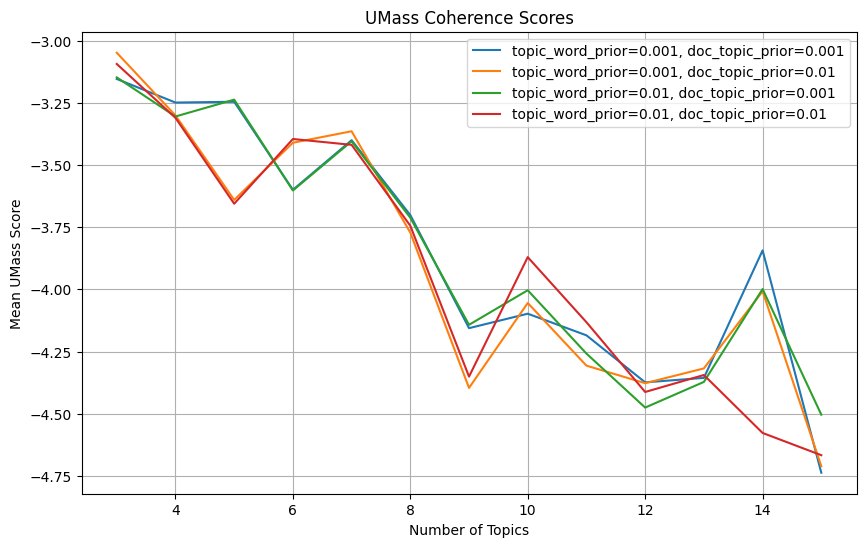

Extracting the best parameters and score...
Retraining with the best parameters on the full dataset...
Converting dtm to csr_matrix...
Generating the pyLDAvis display...


c:\Users\danie\Coding\CSE6242_project\project6242\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(


Training process is completed!


In [6]:
#Try to run all the different dtm and their vectorizer
training_path = 'conf/train_model.yaml'
trump_count_dtm = dtm_results['trump']['count_dtm']
count_vect= dtm_results['vectorizer']['count_vectorizer']
trump_count_display = train_model.training_pipeline(training_path, dtm= trump_count_dtm, vectorizer=count_vect, random_seed = 0, sample_size = 10000, topn = 10)
pyLDAvis.enable_notebook()
pyLDAvis.display(trump_count_display)

Loading config...
Loading parameters from config...
Generating a small training sample...
Training and evaluating on the small sample size...
Plotting results...


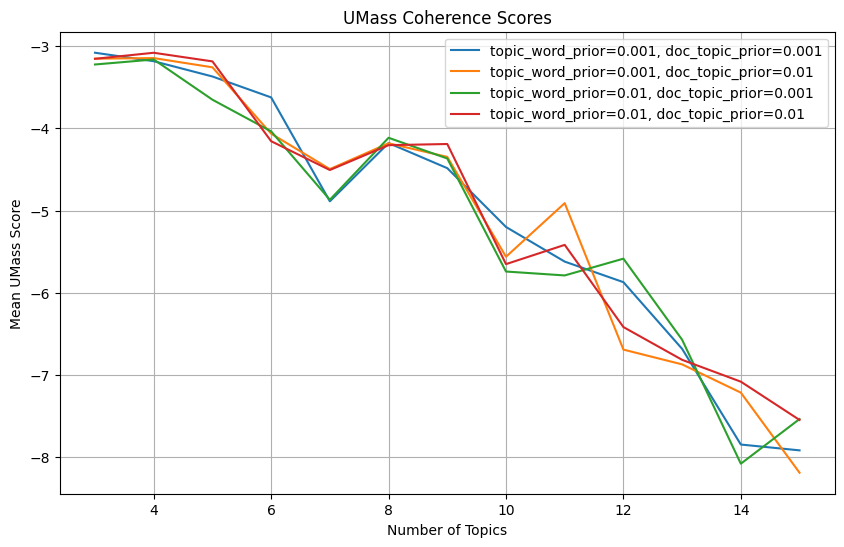

Extracting the best parameters and score...
Retraining with the best parameters on the full dataset...
Converting dtm to csr_matrix...
Generating the pyLDAvis display...


c:\Users\danie\Coding\CSE6242_project\project6242\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(


Training process is completed!


In [7]:
tfidf_vect= dtm_results['vectorizer']['tfidf_vectorizer']
trump_tfidf_dtm = dtm_results['trump']['tfidf_dtm']
trump_tfidf_display = train_model.training_pipeline(training_path, dtm= trump_tfidf_dtm, vectorizer=tfidf_vect, random_seed = 0, sample_size = 10000, topn = 10)
pyLDAvis.enable_notebook()
pyLDAvis.display(trump_tfidf_display)

Loading config...
Loading parameters from config...
Generating a small training sample...
Training and evaluating on the small sample size...
Plotting results...


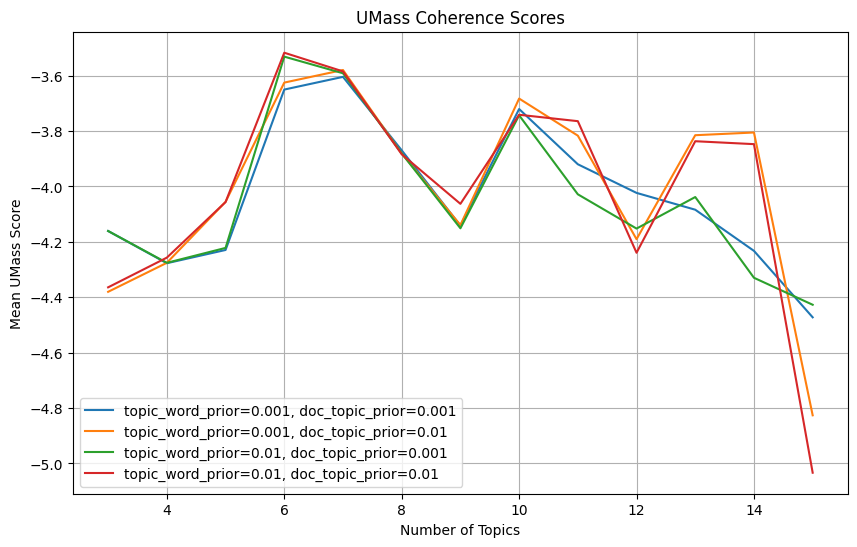

Extracting the best parameters and score...
Retraining with the best parameters on the full dataset...
Converting dtm to csr_matrix...
Generating the pyLDAvis display...


c:\Users\danie\Coding\CSE6242_project\project6242\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(


Training process is completed!


In [8]:
biden_count_dtm = dtm_results['biden']['count_dtm']
biden_count_display = train_model.training_pipeline(training_path, dtm= biden_count_dtm, vectorizer=count_vect, random_seed = 0, sample_size = 10000, topn = 10)
pyLDAvis.enable_notebook()
pyLDAvis.display(biden_count_display)

Loading config...
Loading parameters from config...
Generating a small training sample...
Training and evaluating on the small sample size...
Plotting results...


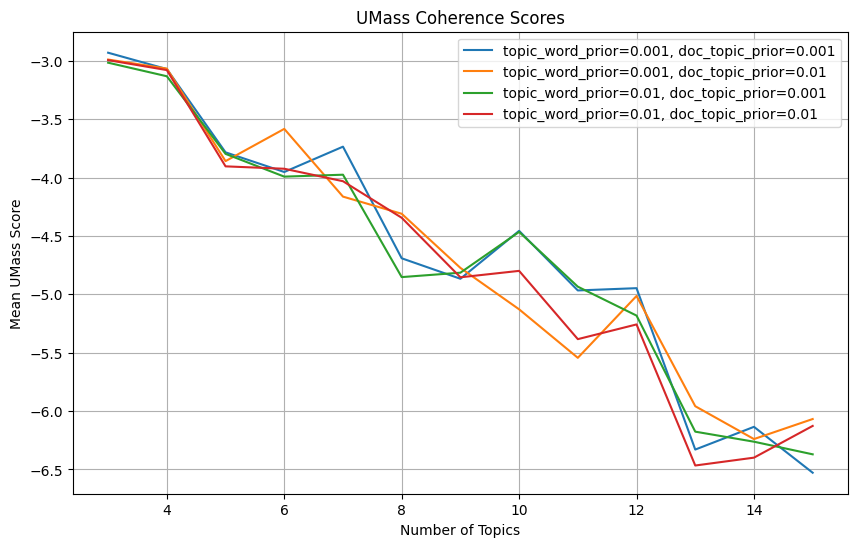

Extracting the best parameters and score...
Retraining with the best parameters on the full dataset...
Converting dtm to csr_matrix...
Generating the pyLDAvis display...


c:\Users\danie\Coding\CSE6242_project\project6242\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(


Training process is completed!


In [9]:
biden_tfidf_dtm = dtm_results['biden']['tfidf_dtm']
biden_tfidf_display = train_model.training_pipeline(training_path, dtm= biden_tfidf_dtm, vectorizer=tfidf_vect, random_seed = 0, sample_size = 10000, topn = 10)
pyLDAvis.enable_notebook()
pyLDAvis.display(biden_tfidf_display)

Loading config...
Loading parameters from config...
Generating a small training sample...
Training and evaluating on the small sample size...
Plotting results...


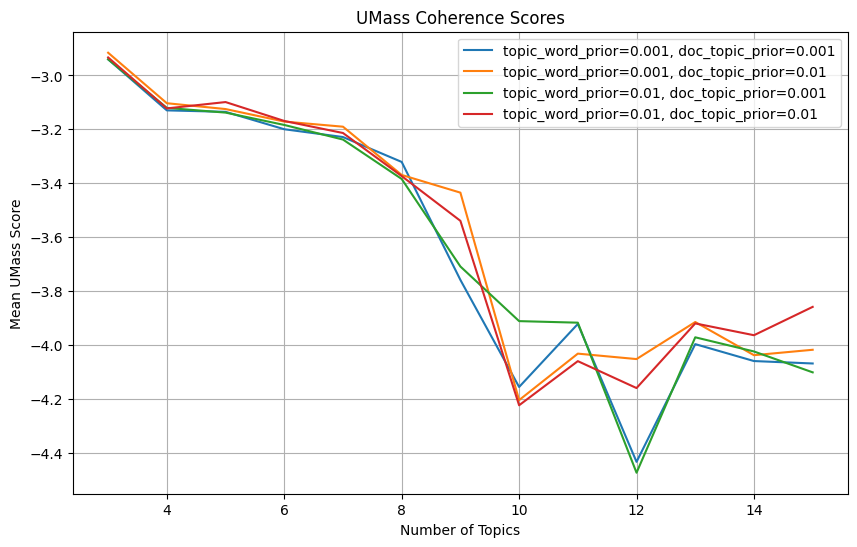

Extracting the best parameters and score...
Retraining with the best parameters on the full dataset...
Converting dtm to csr_matrix...
Generating the pyLDAvis display...


c:\Users\danie\Coding\CSE6242_project\project6242\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(


Training process is completed!


In [10]:
combine_count_dtm = dtm_results['combine']['count_dtm']
combine_count_display = train_model.training_pipeline(training_path, dtm= combine_count_dtm, vectorizer=count_vect, random_seed = 0, sample_size = 10000, topn = 10)
pyLDAvis.enable_notebook()
pyLDAvis.display(combine_count_display)

Loading config...
Loading parameters from config...
Generating a small training sample...
Training and evaluating on the small sample size...
Plotting results...


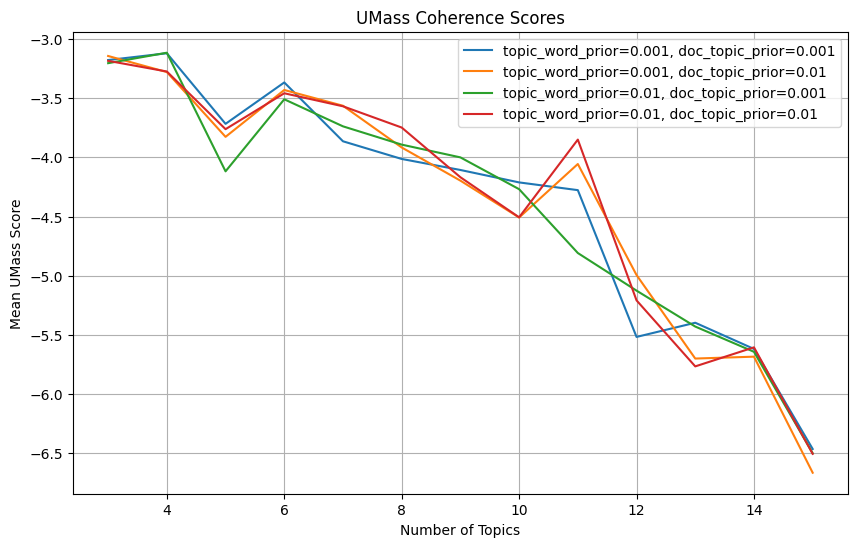

Extracting the best parameters and score...
Retraining with the best parameters on the full dataset...
Converting dtm to csr_matrix...
Generating the pyLDAvis display...


c:\Users\danie\Coding\CSE6242_project\project6242\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(


Training process is completed!


In [11]:
combine_tfidf_dtm = dtm_results['combine']['tfidf_dtm']
combine_tfidf_display = train_model.training_pipeline(training_path, dtm= combine_tfidf_dtm, vectorizer=tfidf_vect, random_seed = 0, sample_size = 10000, topn = 10)
pyLDAvis.enable_notebook()
pyLDAvis.display(combine_tfidf_display)